In [3]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Exercise 1
df1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

enc = preprocessing.OrdinalEncoder()
df1 = enc.fit_transform(df1)
min_max_scaler = preprocessing.MinMaxScaler()
f_train_minmax = min_max_scaler.fit_transform(df1)
f_train_minmax


array([[0.76327748, 0.        , 0.        , ..., 0.08964646, 0.38361409,
        0.        ],
       [0.56262425, 1.        , 0.        , ..., 0.31439394, 0.2245023 ,
        0.        ],
       [0.36410111, 1.        , 0.        , ..., 0.27525253, 0.02404288,
        1.        ],
       ...,
       [0.47813121, 0.        , 0.        , ..., 0.0864899 , 0.45849923,
        0.        ],
       [0.84265834, 1.        , 1.        , ..., 0.50189394, 0.40735069,
        1.        ],
       [0.31610338, 1.        , 0.        , ..., 0.87626263, 0.8280245 ,
        0.        ]])

Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.94

Graphs for predictions of 20, 30 and 40:


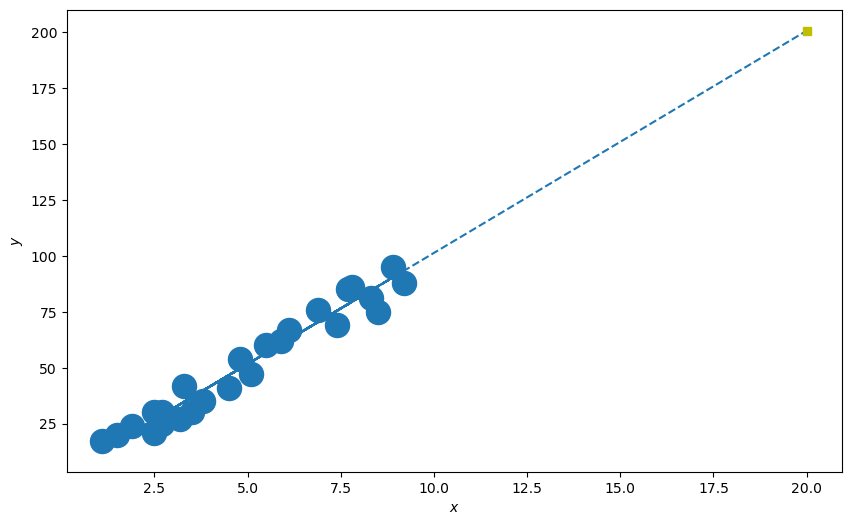

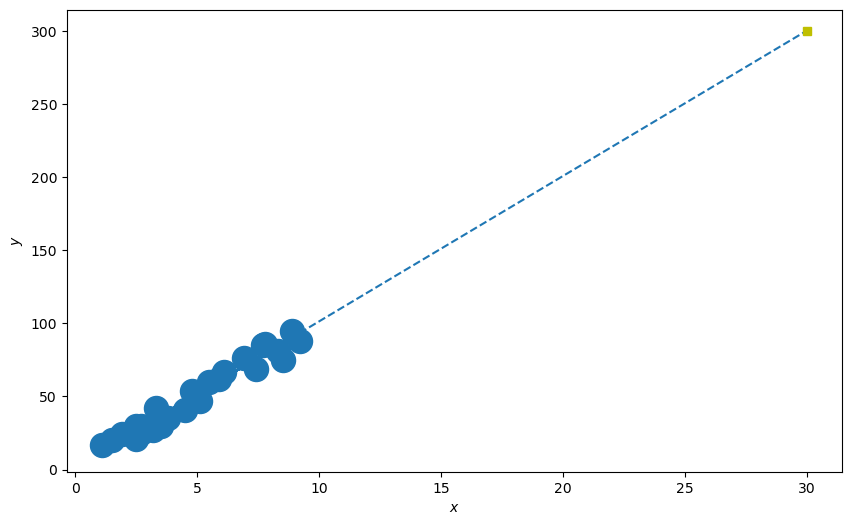

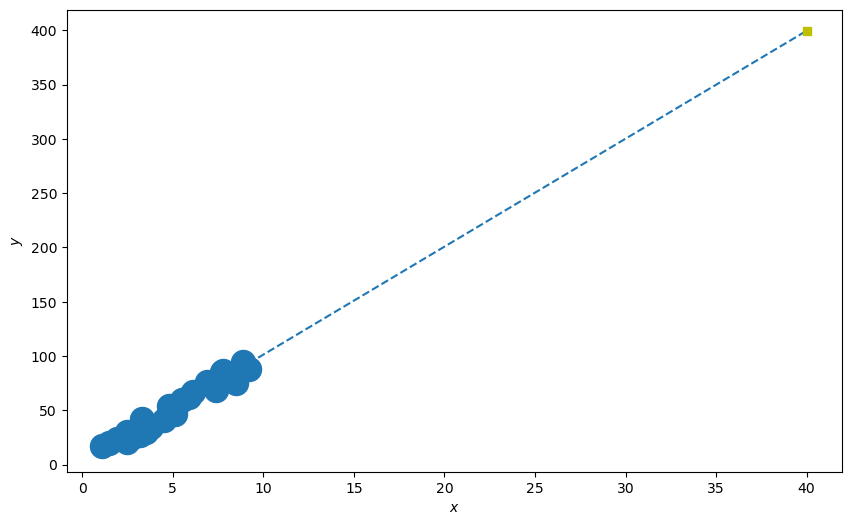

In [5]:
#Exercise 2

df2 = pd.read_csv('score.csv')

X = np.array(df2['Hours'])
Y = np.array(df2['Scores'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

lr = LinearRegression().fit(X_train, y_train)


print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

pred = lr.predict([[20]])

a = lr.coef_[0]

b = lr.intercept_

fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))


x = X.T

best_fit = b + a * (np.append(x, [20]))

ax_scat.scatter(X, Y, s=300, label='Training Data')
ax_scat.plot(np.append(x,[20]), best_fit, ls='--', label='Best Fit Line')

ax_scat.plot([20],pred, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$');

pred1 = lr.predict([[30]])

fig_scat1, ax_scat1 = plt.subplots(1,1, figsize=(10,6))

x = X.T

best_fit = b + a * (np.append(x, [30]))

ax_scat1.scatter(X, Y, s=300, label='Training Data')
ax_scat1.plot(np.append(x,[30]), best_fit, ls='--', label='Best Fit Line')

ax_scat1.plot([30],pred1, "ys", label="LinearRegression")
ax_scat1.set_xlabel(r'$x$')
ax_scat1.set_ylabel(r'$y$');

pred2 = lr.predict([[40]])

fig_scat1, ax_scat1 = plt.subplots(1,1, figsize=(10,6))

x = X.T

best_fit = b + a * (np.append(x, [40]))

ax_scat1.scatter(X, Y, s=300, label='Training Data')
ax_scat1.plot(np.append(x,[40]), best_fit, ls='--', label='Best Fit Line')

ax_scat1.plot([40],pred2, "ys", label="LinearRegression")
ax_scat1.set_xlabel(r'$x$')
ax_scat1.set_ylabel(r'$y$');

print("\nGraphs for predictions of 20, 30 and 40:")

In [6]:
#Exercise 3

ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"\nRidge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")


lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"\nLasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")


elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"\nElastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")


Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.94

Lasso Regression-Training set score: 0.95
Lasso Regression-Test set score: 0.94

Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.94
